In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
housedf=pd.read_csv('C:/Users/almet/OneDrive/Desktop/JP/USAhouseprediction.csv')

In [6]:
housedf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [7]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# 1. Load the dataset
housedf = pd.read_csv('C:/Users/almet/OneDrive/Desktop/JP/USAhouseprediction.csv')

# 2. Drop unnecessary columns
housedf.drop(columns=['date', 'street', 'country'], inplace=True)

# 3. One-Hot Encoding for categorical variables
housedf = pd.get_dummies(housedf, columns=['city', 'statezip'], drop_first=True)

# 4. Check and fill any missing values (if any)
housedf.fillna(housedf.median(), inplace=True)

# 5. Feature Scaling (Standardization) for numerical features
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                      'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
scaler = StandardScaler()
housedf[numerical_features] = scaler.fit_transform(housedf[numerical_features])

# 6. Split the data into train and test sets
X = housedf.drop(columns=['price'])  # Features
y = housedf['price']  # Target variable

# Ensure X and y are of type float64 for mathematical operations
X = X.astype(np.float64)
y = y.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Implementation from Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # Add bias term (intercept)
        self.theta = np.zeros(n + 1)  # Initialize parameters

        prev_cost = float('inf')

        # Gradient Descent
        for epoch in range(self.epochs):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradients = (1/m) * X.T.dot(errors)
            self.theta -= self.learning_rate * gradients

            # Calculate and monitor the cost (MSE) to apply early stopping
            cost = self.mean_squared_error(y, predictions)
            if abs(prev_cost - cost) < 1e-6:
                print(f"Converged after {epoch} epochs")
                break
            prev_cost = cost

    def predict(self, X):
        m = X.shape[0]
        X = np.c_[np.ones(m), X]  # Add bias term
        return X.dot(self.theta)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# 7. Train the model using Linear Regression from Scratch
model = LinearRegressionScratch(learning_rate=0.01, epochs=10000)
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model (R² score)
accuracy = r2_score(y_test, y_pred) * 100
print(f'Model Accuracy (R² Score): {accuracy:.2f}%')


Model Accuracy (R² Score): 55.06%


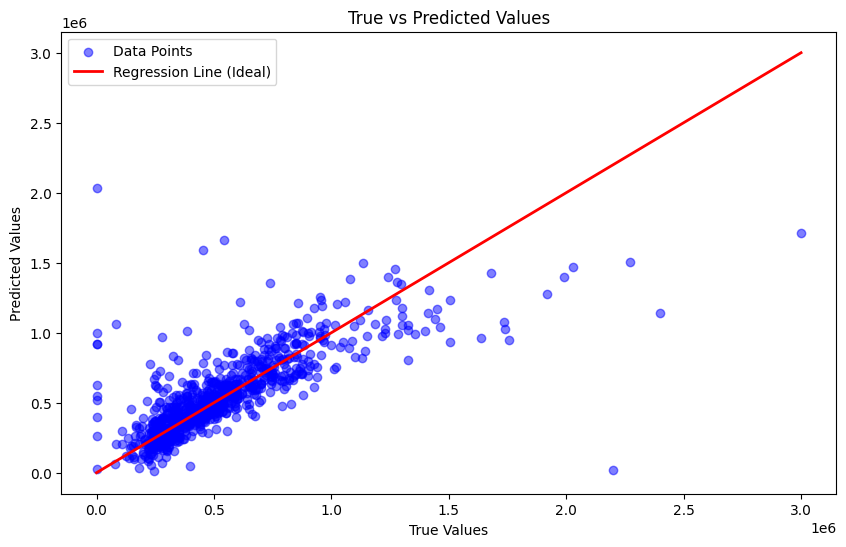

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot of true vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Data Points")

# Plot identity line (perfect predictions) for reference
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linewidth=2, label="Regression Line (Ideal)")

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()